<a href="https://colab.research.google.com/github/Rizkifadillah/googlecolab/blob/main/data_science/S2/E4_Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install luwiji

In [35]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [36]:
# Import data dan drop kolom yang tidak digunakan
df_path = '/content/drive/MyDrive/course_ipynb/Kumpulan_dataset/carprice.csv'
df = pd.read_csv(df_path, index_col="ID")
df.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


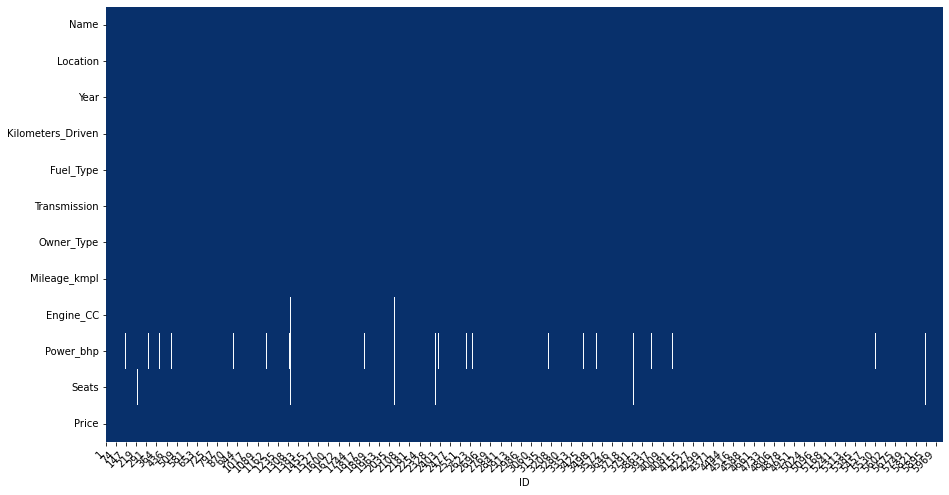

In [37]:
plot_missing_value(df)

In [38]:
df.drop(columns="Name", inplace=True)

## ***Dataset Splitting***

***Menggunakan Algoritma Regresi (Prediksi harga mobil)***

In [39]:
# Split dataset
X = df.drop(columns="Price") #X => kolom feature/input => Location	Year	Kilometers_Driven	Fuel_Type	Transmission	Owner_Type	Mileage_kmpl	Engine_CC	Power_bhp	Seats
y = df.Price # y => kolom label/target => Price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4762, 10), (1191, 10), (4762,), (1191,))

## ***Training***

In [40]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [41]:
X_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats
ID,,,,,,,,,,
4380,Coimbatore,2016,60913,Petrol,Manual,First,20.73,1373.0,91.1,5.0
2676,Kochi,2017,40459,Diesel,Manual,First,19.67,1582.0,126.2,5.0
647,Jaipur,2004,200000,Petrol,Manual,First,0.00,1086.0,NaN,5.0
5966,Hyderabad,2018,1048,Petrol,Manual,First,18.90,998.0,67.1,5.0
2198,Ahmedabad,2013,96000,Diesel,Manual,Second,23.50,1498.0,90.0,5.0


In [42]:
X_train.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp', 'Seats'],
      dtype='object')

In [43]:
gsp.svm_params

{'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [44]:
# preprocessor
preprocessor = ColumnTransformer([
    ("numerical", num_pipe(), ["Year", "Kilometers_Driven", "Mileage_kmpl","Engine_CC","Power_bhp","Seats"]),
    ("categoric", cat_pipe(encoder='onehot'), ["Location", "Fuel_Type","Transmission","Owner_Type"])
])

# menggunakan Regression->Support Vector Mechine(SVM)
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 10.0, 'algo__gamma': 0.001}
0.4191924234077009 0.08719422320538917 0.055845667362476537


# ***Scaling can help SVM and KNN***

In [29]:
# preprocessor
preprocessor = ColumnTransformer([
    ("numerical", num_pipe(scaling="robust"), ["Year", "Kilometers_Driven", "Mileage_kmpl","Engine_CC","Power_bhp","Seats"]),
    ("categoric", cat_pipe(encoder='onehot'), ["Location", "Fuel_Type","Transmission","Owner_Type"])
])

# menggunakan Regression->Support Vector Mechine(SVM)
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 10.0, 'algo__gamma': 0.1}
0.8692907569381978 0.8365068850275925 0.8314246832596818


## ***Save Model***

In [45]:
save_model(model.best_estimator_, "car_price_predict_small.pkl", "/content/drive/MyDrive/course_ipynb/model_small" )

Model is pickled as /content/drive/MyDrive/course_ipynb/model_small/car_price_predict_small.pkl


## ***Polynomial Feature***

In [20]:
from luwiji.svm import demo

In [21]:
demo.poly_features()

interactive(children=(ToggleButtons(description='degree', options=(1, 2, 3), value=1), Checkbox(value=False, d…

In [46]:
gsp.svm_poly_params

{'prep__numeric__poly__degree': [1, 2, 3],
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [ ]:
# preprocessor
preprocessor = ColumnTransformer([
    ("numerical", num_pipe(poly=2, scaling="standard"), ["Year", "Kilometers_Driven", "Mileage_kmpl","Engine_CC","Power_bhp","Seats"]),
    ("categoric", cat_pipe(encoder='onehot'), ["Location", "Fuel_Type","Transmission","Owner_Type"])
])

# menggunakan Regression->Support Vector Mechine(SVM)
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_poly_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train) #error mungkin karena terlalu berat

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

# ***Save Model***

In [ ]:
save_model(model.best_estimator_, "car_price_predict_small.pkl", "/content/drive/MyDrive/course_ipynb/model_small" )